# 🧠 Prédire si un Pokémon est un gagnant
Ce notebook utilise un réseau de neurones simple en PyTorch pour prédire si un Pokémon est un gagnant, en utilisant des statistiques comme HP, Attack, Defense, etc.
On utilise `BCEWithLogitsLoss` pour éviter l'effet 100 % sur toutes les prédictions.

In [14]:
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Chargement du dataset
df = pd.read_csv("data/Pokemon.csv")
df = df.dropna()
df = df.drop_duplicates()
df["gagnant"] = df["Legendary"].astype(int)

# Sélection des colonnes pertinentes
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]
X = df[features].values
y = df["gagnant"].values

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [16]:
# Définition du modèle
class PokemonClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(7, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    def forward(self, x):
        return self.model(x)

model = PokemonClassifier()

In [17]:
# Entraînement
pos_weight = torch.tensor([2.5])  # Ajustable
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

Epoch 1 - Loss: 0.6756
Epoch 2 - Loss: 0.6517
Epoch 3 - Loss: 0.6263
Epoch 4 - Loss: 0.5997
Epoch 5 - Loss: 0.5723
Epoch 6 - Loss: 0.5440
Epoch 7 - Loss: 0.5158
Epoch 8 - Loss: 0.4877
Epoch 9 - Loss: 0.4605
Epoch 10 - Loss: 0.4345
Epoch 11 - Loss: 0.4100
Epoch 12 - Loss: 0.3869
Epoch 13 - Loss: 0.3652
Epoch 14 - Loss: 0.3449
Epoch 15 - Loss: 0.3255
Epoch 16 - Loss: 0.3071
Epoch 17 - Loss: 0.2897
Epoch 18 - Loss: 0.2733
Epoch 19 - Loss: 0.2577
Epoch 20 - Loss: 0.2429


Accuracy: 0.9397590361445783
Matrice de confusion:
 [[72  2]
 [ 3  6]]


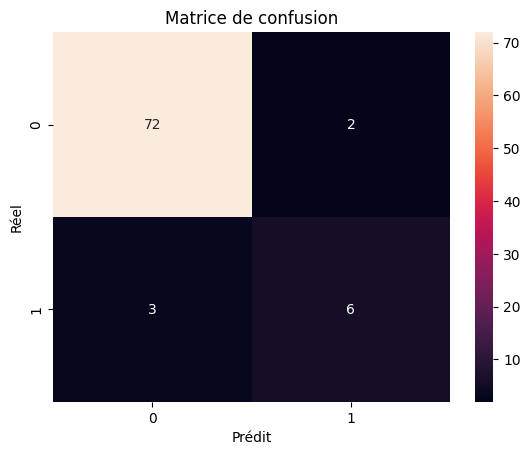

In [18]:
# Évaluation
with torch.no_grad():
    predictions = torch.sigmoid(model(X_test))
    predictions = (predictions > 0.5).int()
    acc = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    print("Accuracy:", acc)
    print("Matrice de confusion:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Matrice de confusion")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Reprendre les features utilisées pour l'entraînement
X = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]]

# 2. Créer et entraîner le scaler
scaler = StandardScaler()
scaler.fit(X)

# 3. Sauvegarder le scaler
joblib.dump(scaler, "model/scaler_pokemon.pkl")

['model/scaler_pokemon.pkl']

In [20]:
torch.save(model.state_dict(), "model/pokemon_state_dict.pt")